In [254]:
import pandas as pd
import numpy as np

In [255]:
data = pd.read_csv("light-bulb-raw-export.csv")
data.head()

,timestamp,current,lampIsRunning,voltage
0,2019-11-05 09:19:17,0.000000,False,0.000000
1,2019-11-05 09:19:17,0.000000,False,0.000000
2,2019-11-05 09:19:17,138.933486,False,34.535565
3,2019-11-05 09:19:17,138.933486,True,34.535565
4,2019-11-05 09:19:17,139.860172,True,33.039042


In [256]:
# check if there is any null
data.isnull().values.any()
data.dropna(inplace=True)

In [257]:
# reverse data table
data = data.iloc[::-1]

In [258]:
data.describe()

,current,voltage
count,10676.000000,10676.000000
mean,137.656154,11.695346
std,21.068849,7.244864
min,0.000000,0.000000
25%,120.795369,6.180031
50%,139.525598,11.110937
75%,156.446747,16.550302
max,177.829100,76.108256


In [259]:
print(data["voltage"].max())
print(data["current"].max())

#data["voltage"] = data["voltage"] / data["voltage"].max()
#data["current"] = data["current"] / data["current"].max()

76.10825644869111
177.8291001434133


In [260]:
data.describe()

,current,voltage
count,10676.000000,10676.000000
mean,137.656154,11.695346
std,21.068849,7.244864
min,0.000000,0.000000
25%,120.795369,6.180031
50%,139.525598,11.110937
75%,156.446747,16.550302
max,177.829100,76.108256


In [261]:
# delete timestamp column
data.drop(columns="timestamp", inplace=True)
data

,current,lampIsRunning,voltage
10675,119.192881,False,63.507204
10674,0.000000,False,0.000000
10673,120.000000,True,16.000000
10672,120.145668,True,15.314180
10671,119.992079,True,14.776122
...,...,...,...
4,139.860172,True,33.039042
3,138.933486,True,34.535565
2,138.933486,False,34.535565
1,0.000000,False,0.000000


## Regression of time to failure

In [262]:
data['failure'] = (data['lampIsRunning'] == False).astype(int)
data

,current,lampIsRunning,voltage,failure
10675,119.192881,False,63.507204,1
10674,0.000000,False,0.000000,1
10673,120.000000,True,16.000000,0
10672,120.145668,True,15.314180,0
10671,119.992079,True,14.776122,0
...,...,...,...,...
4,139.860172,True,33.039042,0
3,138.933486,True,34.535565,0
2,138.933486,False,34.535565,1
1,0.000000,False,0.000000,1


In [263]:
s = data['failure'].iloc[::-1].cumsum()
data['ttf'] = s.groupby(s).cumcount()
data.describe()

,current,voltage,failure,ttf
count,10676.000000,10676.000000,10676.000000,10676.000000
mean,137.656154,11.695346,0.001686,4672.209442
std,21.068849,7.244864,0.041029,3033.832973
min,0.000000,0.000000,0.000000,0.000000
25%,120.795369,6.180031,0.000000,1972.750000
50%,139.525598,11.110937,0.000000,4641.500000
75%,156.446747,16.550302,0.000000,7310.250000
max,177.829100,76.108256,1.000000,9979.000000


In [264]:
data = data[data['ttf'] < 120]
data.describe()

,current,voltage,failure,ttf
count,540.000000,540.000000,540.000000,540.000000
mean,106.923391,23.458041,0.033333,48.612963
std,31.741608,10.359882,0.179672,34.037852
min,0.000000,0.000000,0.000000,0.000000
25%,97.428485,18.082457,0.000000,20.000000
50%,112.333759,20.727475,0.000000,43.000000
75%,123.370044,24.811745,0.000000,74.250000
max,141.036555,76.108256,1.000000,119.000000


In [265]:
data.drop(columns="failure", inplace=True)
data.drop(columns="lampIsRunning", inplace=True)
data.head()

c:\users\gralakj\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,current,voltage,ttf
10675,119.192881,63.507204,0
10674,0.000000,0.000000,0
10673,120.000000,16.000000,40
10672,120.145668,15.314180,39
10671,119.992079,14.776122,38


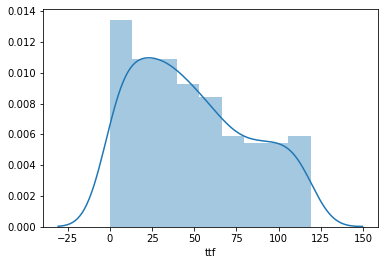

In [266]:
import seaborn as sbs
import matplotlib.pyplot as plt

sbs.distplot(data['ttf'])

In [267]:
from collections import deque
import random

LOOKBACK_SIZE = 20

seq_data = []
prev_data = deque(maxlen=LOOKBACK_SIZE)

for row in data.values:
    prev_data.append([columns for columns in row[:-1]])
    if len(prev_data) == LOOKBACK_SIZE:
        seq_data.append([np.array(prev_data), row[-1]])


random.shuffle(seq_data)
       
seq_data[0]

[array([[ 73.14069326,  52.2894471 ],
        [ 73.14069326,  52.4162953 ],
        [ 72.93977976,  52.63023275],
        [ 72.63639325,  52.63023275],
        [ 72.63639325,  53.15041305],
        [ 72.00027271,  53.15041305],
        [ 72.00027271,  53.11219602],
        [ 56.        ,  53.11219602],
        [ 56.        ,  53.11219602],
        [  0.        ,   0.        ],
        [120.        ,  16.        ],
        [119.10056244,  15.42297617],
        [119.73266401,  15.42297617],
        [119.73266401,  15.36772743],
        [119.85014806,  15.36772743],
        [119.85014806,  16.08615353],
        [120.32506299,  16.08615353],
        [120.32506299,  15.12209338],
        [120.11256839,  15.12209338],
        [120.11256839,  15.6167946 ]]), 47.0]

In [268]:
X = []
y = []

for seq, target in seq_data:
    X.append(seq.ravel())  # seq.flatten() should work as well
    y.append(target)

train_x = np.array(X)
train_y = np.array(y)

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
X, X_test, y, y_test = train_test_split(train_x, train_y, test_size=0.33)

In [271]:
# X,y  - zbiór uczacy
# X_test, y_test - zbiór testujacy
X.shape

(349, 40)

Train on 279 samples, validate on 70 samples
Epoch 1/350
279/279 [==============================] - 0s 794us/step - loss: 2803.2656 - accuracy: 0.0108 - val_loss: 2118.9204 - val_accuracy: 0.0000e+00
Epoch 2/350
279/279 [==============================] - 0s 59us/step - loss: 2492.8667 - accuracy: 0.0036 - val_loss: 2001.3703 - val_accuracy: 0.0000e+00
Epoch 3/350
279/279 [==============================] - 0s 90us/step - loss: 2234.4215 - accuracy: 0.0036 - val_loss: 1927.2171 - val_accuracy: 0.0000e+00
Epoch 4/350
279/279 [==============================] - 0s 137us/step - loss: 2053.1242 - accuracy: 0.0036 - val_loss: 1833.3658 - val_accuracy: 0.0286
Epoch 5/350
279/279 [==============================] - 0s 131us/step - loss: 1875.1071 - accuracy: 0.0036 - val_loss: 1768.9041 - val_accuracy: 0.0143
Epoch 6/350
279/279 [==============================] - 0s 119us/step - loss: 1701.0426 - accuracy: 0.0000e+00 - val_loss: 1701.9480 - val_accuracy: 0.0143
Epoch 7/350
279/279 [==============

Epoch 54/350
279/279 [==============================] - 0s 120us/step - loss: 870.6459 - accuracy: 0.0179 - val_loss: 1047.4934 - val_accuracy: 0.0143
Epoch 55/350
279/279 [==============================] - 0s 75us/step - loss: 888.2565 - accuracy: 0.0251 - val_loss: 1039.7102 - val_accuracy: 0.0000e+00
Epoch 56/350
279/279 [==============================] - 0s 119us/step - loss: 884.1330 - accuracy: 0.0251 - val_loss: 1037.8087 - val_accuracy: 0.0143
Epoch 57/350
279/279 [==============================] - 0s 133us/step - loss: 895.7493 - accuracy: 0.0179 - val_loss: 1037.5831 - val_accuracy: 0.0143
Epoch 58/350
279/279 [==============================] - 0s 102us/step - loss: 872.0429 - accuracy: 0.0323 - val_loss: 1054.8190 - val_accuracy: 0.0143
Epoch 59/350
279/279 [==============================] - 0s 68us/step - loss: 863.5681 - accuracy: 0.0358 - val_loss: 1047.9362 - val_accuracy: 0.0143
Epoch 60/350
279/279 [==============================] - 0s 97us/step - loss: 855.7038 - accu

279/279 [==============================] - 0s 84us/step - loss: 758.3816 - accuracy: 0.0466 - val_loss: 974.1281 - val_accuracy: 0.0000e+00
Epoch 109/350
279/279 [==============================] - 0s 128us/step - loss: 751.4141 - accuracy: 0.0466 - val_loss: 982.0994 - val_accuracy: 0.0286
Epoch 110/350
279/279 [==============================] - 0s 88us/step - loss: 753.0597 - accuracy: 0.0323 - val_loss: 970.0751 - val_accuracy: 0.0429
Epoch 111/350
279/279 [==============================] - 0s 115us/step - loss: 749.2406 - accuracy: 0.0358 - val_loss: 989.2598 - val_accuracy: 0.0143
Epoch 112/350
279/279 [==============================] - 0s 84us/step - loss: 746.6200 - accuracy: 0.0323 - val_loss: 965.8078 - val_accuracy: 0.0143
Epoch 113/350
279/279 [==============================] - 0s 111us/step - loss: 749.8430 - accuracy: 0.0251 - val_loss: 977.8989 - val_accuracy: 0.0143
Epoch 114/350
279/279 [==============================] - 0s 86us/step - loss: 762.7109 - accuracy: 0.0287 -

Epoch 216/350
279/279 [==============================] - 0s 61us/step - loss: 684.9953 - accuracy: 0.0430 - val_loss: 927.8813 - val_accuracy: 0.0143
Epoch 217/350
279/279 [==============================] - 0s 111us/step - loss: 687.3139 - accuracy: 0.0358 - val_loss: 937.1640 - val_accuracy: 0.0000e+00
Epoch 218/350
279/279 [==============================] - 0s 72us/step - loss: 674.5893 - accuracy: 0.0358 - val_loss: 929.4243 - val_accuracy: 0.0143
Epoch 219/350
279/279 [==============================] - 0s 92us/step - loss: 680.6067 - accuracy: 0.0538 - val_loss: 938.0182 - val_accuracy: 0.0000e+00
Epoch 220/350
279/279 [==============================] - 0s 65us/step - loss: 678.3963 - accuracy: 0.0287 - val_loss: 929.3799 - val_accuracy: 0.0143
Epoch 221/350
279/279 [==============================] - 0s 65us/step - loss: 680.9355 - accuracy: 0.0394 - val_loss: 945.0476 - val_accuracy: 0.0143
Epoch 222/350
279/279 [==============================] - 0s 101us/step - loss: 686.7025 - a

Epoch 270/350
279/279 [==============================] - 0s 81us/step - loss: 652.2869 - accuracy: 0.0430 - val_loss: 906.7448 - val_accuracy: 0.0143
Epoch 271/350
279/279 [==============================] - 0s 83us/step - loss: 663.5488 - accuracy: 0.0394 - val_loss: 919.5634 - val_accuracy: 0.0143
Epoch 272/350
279/279 [==============================] - 0s 77us/step - loss: 666.0468 - accuracy: 0.0430 - val_loss: 901.9315 - val_accuracy: 0.0000e+00
Epoch 273/350
279/279 [==============================] - 0s 65us/step - loss: 658.7937 - accuracy: 0.0323 - val_loss: 920.6053 - val_accuracy: 0.0000e+00
Epoch 274/350
279/279 [==============================] - 0s 88us/step - loss: 664.7489 - accuracy: 0.0466 - val_loss: 908.4803 - val_accuracy: 0.0000e+00
Epoch 275/350
279/279 [==============================] - 0s 63us/step - loss: 663.4815 - accuracy: 0.0358 - val_loss: 938.0018 - val_accuracy: 0.0000e+00
Epoch 276/350
279/279 [==============================] - 0s 61us/step - loss: 680.98

Epoch 324/350
279/279 [==============================] - 0s 101us/step - loss: 655.2091 - accuracy: 0.0358 - val_loss: 874.2439 - val_accuracy: 0.0000e+00
Epoch 325/350
279/279 [==============================] - 0s 95us/step - loss: 673.6196 - accuracy: 0.0287 - val_loss: 911.4035 - val_accuracy: 0.0286
Epoch 326/350
279/279 [==============================] - 0s 77us/step - loss: 650.0348 - accuracy: 0.0394 - val_loss: 854.4806 - val_accuracy: 0.0000e+00
Epoch 327/350
279/279 [==============================] - 0s 108us/step - loss: 648.6877 - accuracy: 0.0358 - val_loss: 838.6433 - val_accuracy: 0.0143
Epoch 328/350
279/279 [==============================] - 0s 74us/step - loss: 627.9264 - accuracy: 0.0394 - val_loss: 819.9919 - val_accuracy: 0.0000e+00
Epoch 329/350
279/279 [==============================] - 0s 102us/step - loss: 622.7968 - accuracy: 0.0358 - val_loss: 868.7755 - val_accuracy: 0.0286
Epoch 330/350
279/279 [==============================] - 0s 66us/step - loss: 649.108

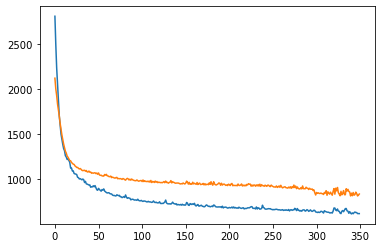

In [272]:
import tensorflow as tf
import tensorflow.keras as keras

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation="relu"))
#model.add(Dense(45))
model.add(Dense(1, activation="relu"))

model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

history = model.fit(X, y, epochs=350, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [273]:
y_pred = model.predict(X_test)

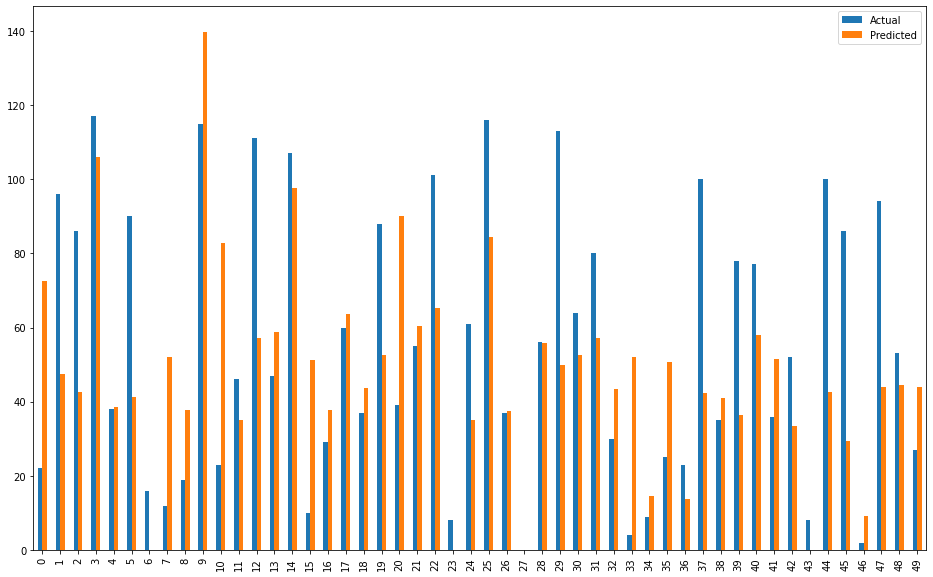

In [274]:
res_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
res_compare = res_compare.head(50)

res_compare.plot(kind="bar", figsize=(16,10))
plt.show()

In [276]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 23.917989882618883
Mean Squared Error: 883.5907663318591
Root Mean Squared Error: 29.72525468909996


In [277]:
# Our average error is around 30s, which is quite a lot...